# Deliverables:

- Submit a single zip-compressed file that has the name: YourLastName_Exercise_3 that has the following files:

 1. Your **PDF document** that has your Source code and output
 2. Your **ipynb script** that has your Source code and output


# Objectives:

In this exercise, you will:

 - Perform data analysis tasks on data read from a CSV file and loaded into a DataFrame object
 - Use sqlalchemy to load data stored in a DatFrame object into sqlite database engine
 - Use sqlalchemy to connect to sqlite database engine to execute  SQL  queries


Formatting Python Code
When programming in Python, refer to Kenneth Reitz’ PEP 8: The Style Guide for Python Code:
http://pep8.org/ (Links to an external site.)Links to an external site.
There is the Google style guide for Python at
https://google.github.io/styleguide/pyguide.html (Links to an external site.)Links to an external site.
Comment often and in detail.


In [1]:
import os

import  pickle

import pandas as pd  # panda's nickname is pd

import numpy as np  # numpy as np

from pandas import DataFrame, Series     # for convenience


In [2]:
### https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
### Execute the code line by line in jupyter-notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# read in the file
xyzcust10=pd.read_csv('xyzcust10.csv')

In [4]:
# what are the data types
(xyzcust10).dtypes

ACCTNO                    object
ZIP                        int64
ZIP4                       int64
LTD_SALES                float64
LTD_TRANSACTIONS           int64
YTD_SALES_2009           float64
YTD_TRANSACTIONS_2009      int64
CHANNEL_ACQUISITION       object
BUYER_STATUS              object
ZIP9_Supercode             int64
ZIP9_SUPERCODE             int64
dtype: object

In [5]:
type(xyzcust10)

pandas.core.frame.DataFrame

In [6]:
# writing out the file as a pickle file
pickle.dump(xyzcust10,open('xyzcust10.p','wb'))

In [7]:
# Lecture Video:  read back in pickle file and make 2 copies
xyzcust10=pickle.load(open('xyzcust10.p','rb'))	

xyzcust10red = xyzcust10.copy() # by default makes a “deep” copy

xyzcust10rev1=xyzcust10.copy() # by default makes a “deep” copy

In [8]:
type(xyzcust10)

pandas.core.frame.DataFrame

In [9]:
xyzcust10.head()

,ACCTNO,ZIP,ZIP4,LTD_SALES,LTD_TRANSACTIONS,YTD_SALES_2009,YTD_TRANSACTIONS_2009,CHANNEL_ACQUISITION,BUYER_STATUS,ZIP9_Supercode,ZIP9_SUPERCODE
0,WDQQLLDQL,60084,5016,90.0,1,0.0,0,IB,INACTIVE,600845016,600845016
1,WQWAYHYLA,60091,1750,4227.0,9,1263.0,3,RT,ACTIVE,600911750,600911750
2,GSHAPLHAW,60067,900,420.0,3,129.0,1,RT,ACTIVE,600670900,600670900
3,PGGYDYWAD,60068,3838,6552.0,6,0.0,0,RT,INACTIVE,600683838,600683838
4,LWPSGPLLS,60090,3932,189.0,3,72.0,1,RT,ACTIVE,600903932,600903932


In [10]:
# Lecture Video: Look at columns
xyzcust10.columns

# Lecture Video: Look at file attribution
xyzcust10.info()

Index(['ACCTNO', 'ZIP', 'ZIP4', 'LTD_SALES', 'LTD_TRANSACTIONS',
       'YTD_SALES_2009', 'YTD_TRANSACTIONS_2009', 'CHANNEL_ACQUISITION',
       'BUYER_STATUS', 'ZIP9_Supercode', 'ZIP9_SUPERCODE'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 11 columns):
ACCTNO                   30471 non-null object
ZIP                      30471 non-null int64
ZIP4                     30471 non-null int64
LTD_SALES                30471 non-null float64
LTD_TRANSACTIONS         30471 non-null int64
YTD_SALES_2009           30471 non-null float64
YTD_TRANSACTIONS_2009    30471 non-null int64
CHANNEL_ACQUISITION      30471 non-null object
BUYER_STATUS             30471 non-null object
ZIP9_Supercode           30471 non-null int64
ZIP9_SUPERCODE           30471 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 2.6+ MB


In [11]:
# are the two zip code columns exactly the same
# Lecture Video: summing up the number of records that do not equal
# so they are exactly the same, they are duplicates
(xyzcust10.ZIP9_Supercode!=xyzcust10.ZIP9_SUPERCODE).sum()

0

In [12]:
# Lecture Video: will show values of field
xyzcust10['ZIP9_Supercode']

0        600845016
1        600911750
2        600670900
3        600683838
4        600903932
5        600858670
6        600913447
7        600911613
8        600683668
9        600911759
10       600818325
11       600562960
12       600912813
13       600673528
14       600603209
15       600891326
16       600692129
17       600911453
18       600682219
19       600624628
20       600912346
21       600614527
22       600612123
23       600894622
24       600626077
25       600818248
26       600932706
27       600623210
28       600933840
29       600905705
           ...    
30441    600987410
30442    600987615
30443    600988020
30444    600988426
30445    600988550
30446    600987893
30447    600987977
30448    600987805
30449    600988014
30450    600988671
30451    600988128
30452    600988760
30453    600988093
30454    600987108
30455    600987552
30456        60098
30457    600989172
30458    600988958
30459    600989029
30460    600987869
30461    600982556
30462    600

In [13]:
# one way to delete a column
del xyzcust10['ZIP9_Supercode']
del xyzcust10rev1['ZIP9_Supercode']

In [14]:
# Lecture Video: another way to delete column
# axis = 1 specifies a column
# inplace = True means that data specified is changed
# inplace = False means that a copy of the object is returned
xyzcust10red.drop('ZIP9_Supercode',axis=1,inplace=True)

In [15]:
# Lecture Video: see if the column is gone
xyzcust10.columns

Index(['ACCTNO', 'ZIP', 'ZIP4', 'LTD_SALES', 'LTD_TRANSACTIONS',
       'YTD_SALES_2009', 'YTD_TRANSACTIONS_2009', 'CHANNEL_ACQUISITION',
       'BUYER_STATUS', 'ZIP9_SUPERCODE'],
      dtype='object')

In [16]:
os.getcwd()

'C:\\Users\\asidd\\Desktop\\MSDS\\420 Database Systems\\Lecture 5\\Exercise 3 Files Version b\\Exercise 3 Files Version b'

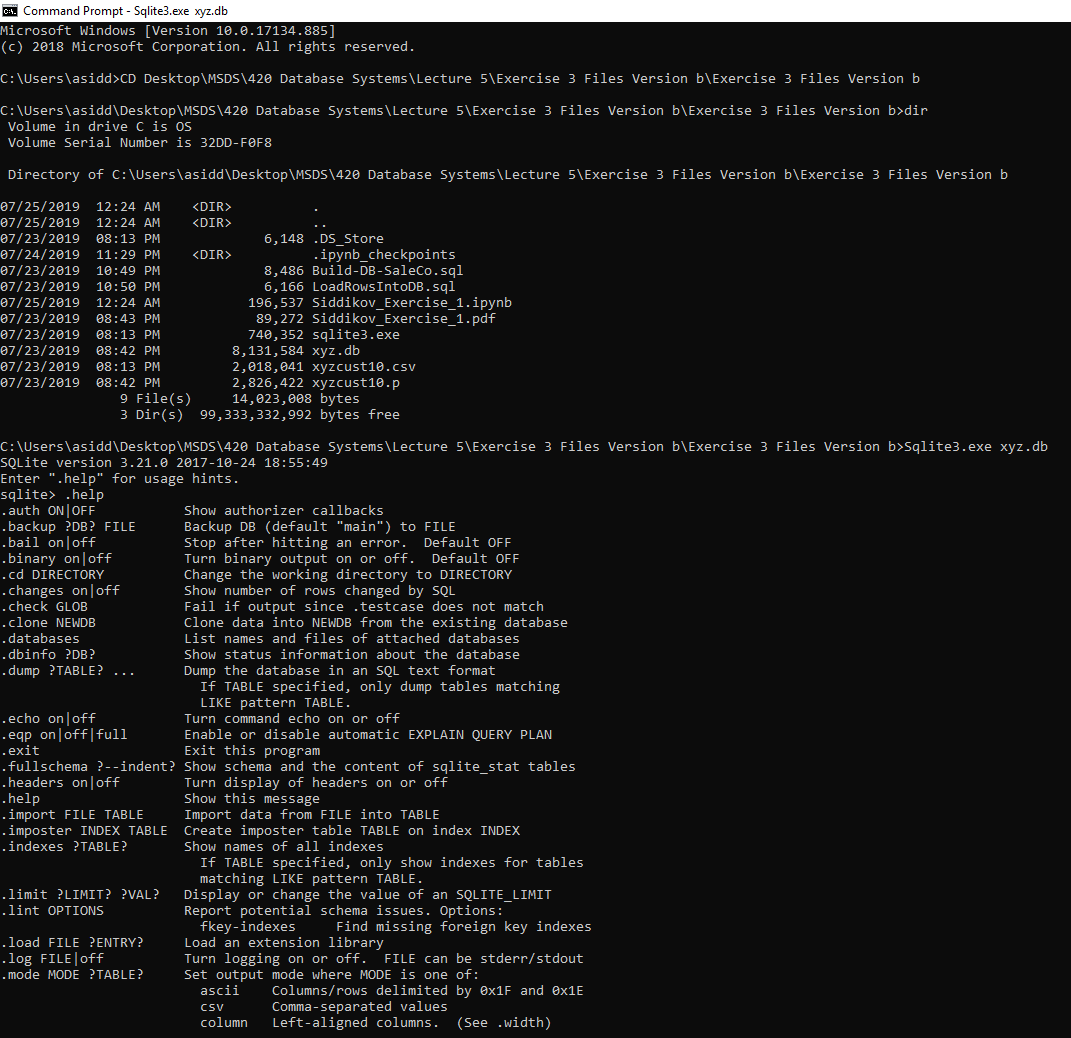

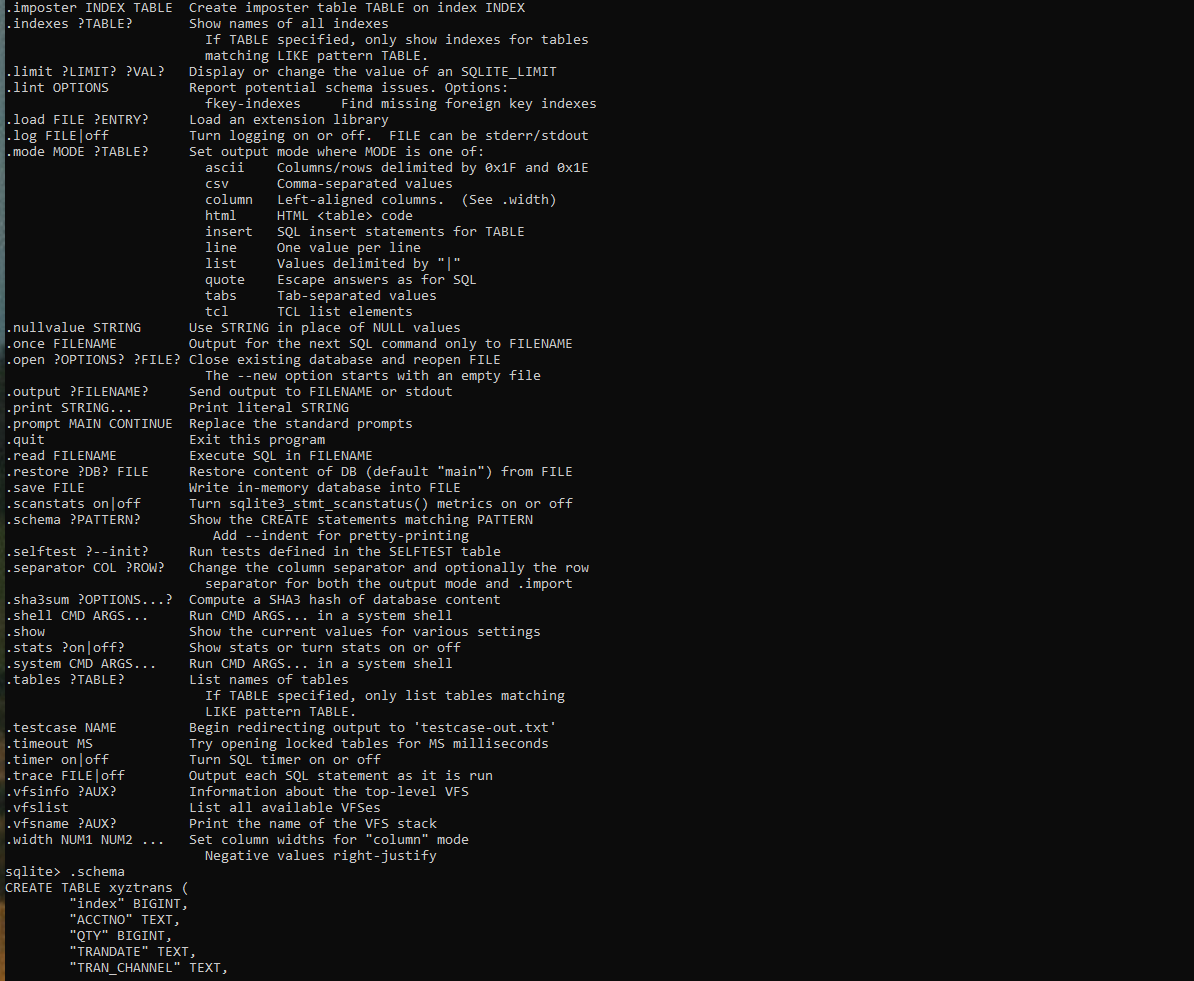

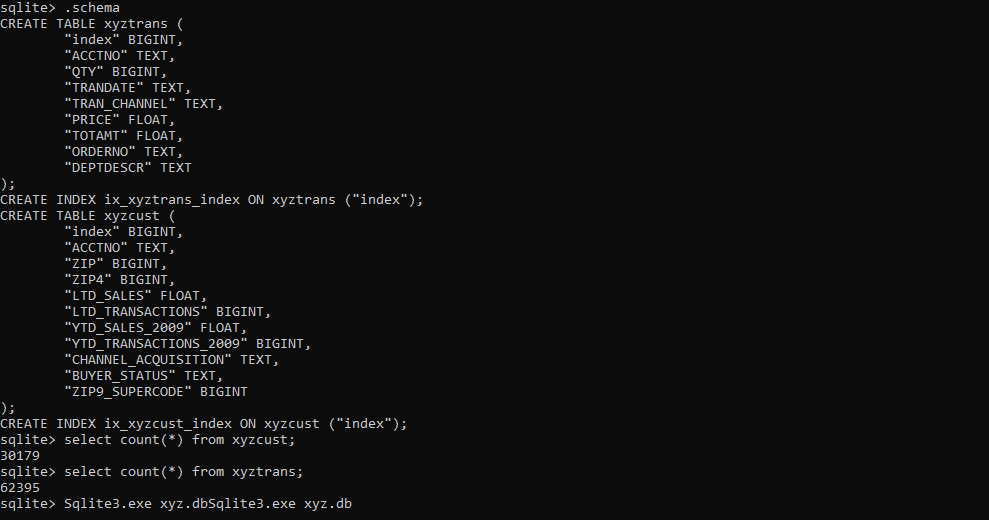

In [17]:
### Optional ###
from IPython.display import Image
from IPython.display import display
x = Image(filename=r'C:\Users\asidd\Downloads\msds_420_cmd1.PNG') 
y = Image(filename=r'C:\Users\asidd\Downloads\msds_420_cmd2.PNG')
z = Image(filename=r'C:\Users\asidd\Downloads\msds_420_cmd3.PNG') 
display(x, y, z)


In [18]:
import sqlalchemy

In [19]:
from sqlalchemy import create_engine

In [20]:
# specify  the database we will work with 
engine=create_engine('sqlite:///xyz.db')

In [21]:
# read in one table
xyztrans=pd.read_sql('xyztrans', engine)

In [22]:
xyztrans.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62395 entries, 0 to 62394
Data columns (total 9 columns):
index           62395 non-null int64
ACCTNO          62395 non-null object
QTY             62395 non-null int64
TRANDATE        62395 non-null object
TRAN_CHANNEL    62395 non-null object
PRICE           62395 non-null float64
TOTAMT          62395 non-null float64
ORDERNO         62395 non-null object
DEPTDESCR       62395 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 4.3+ MB


In [23]:
xyztrans.columns

Index(['index', 'ACCTNO', 'QTY', 'TRANDATE', 'TRAN_CHANNEL', 'PRICE', 'TOTAMT',
       'ORDERNO', 'DEPTDESCR'],
      dtype='object')

In [24]:
# look at the database schema
from sqlalchemy import schema

In [25]:
# retrieving schema for all of engine (xyz database)
xyzMetaData=schema.MetaData(bind=engine)
xyzMetaData.reflect()

In [26]:
xyzMetaData.tables

immutabledict({'xyzcust': Table('xyzcust', MetaData(bind=Engine(sqlite:///xyz.db)), Column('index', BIGINT(), table=<xyzcust>), Column('ACCTNO', TEXT(), table=<xyzcust>), Column('ZIP', BIGINT(), table=<xyzcust>), Column('ZIP4', BIGINT(), table=<xyzcust>), Column('LTD_SALES', FLOAT(), table=<xyzcust>), Column('LTD_TRANSACTIONS', BIGINT(), table=<xyzcust>), Column('YTD_SALES_2009', FLOAT(), table=<xyzcust>), Column('YTD_TRANSACTIONS_2009', BIGINT(), table=<xyzcust>), Column('CHANNEL_ACQUISITION', TEXT(), table=<xyzcust>), Column('BUYER_STATUS', TEXT(), table=<xyzcust>), Column('ZIP9_SUPERCODE', BIGINT(), table=<xyzcust>), schema=None), 'xyztrans': Table('xyztrans', MetaData(bind=Engine(sqlite:///xyz.db)), Column('index', BIGINT(), table=<xyztrans>), Column('ACCTNO', TEXT(), table=<xyztrans>), Column('QTY', BIGINT(), table=<xyztrans>), Column('TRANDATE', TEXT(), table=<xyztrans>), Column('TRAN_CHANNEL', TEXT(), table=<xyztrans>), Column('PRICE', FLOAT(), table=<xyztrans>), Column('TOTAMT'

In [27]:
# ----------------------------------------------------------------------------------
# if you have run this code before, you will have xyzcust table in your database
# to remove the table, you can run the code below
# ----------------------------------------------------------------------------------
sql = ('DROP TABLE IF EXISTS xyzcust;')
result = engine.execute(sql)

# you should only be able to see the yxztrans table
xyzMetaData=schema.MetaData(bind=engine)
xyzMetaData.reflect()
xyzMetaData.tables

immutabledict({'xyztrans': Table('xyztrans', MetaData(bind=Engine(sqlite:///xyz.db)), Column('index', BIGINT(), table=<xyztrans>), Column('ACCTNO', TEXT(), table=<xyztrans>), Column('QTY', BIGINT(), table=<xyztrans>), Column('TRANDATE', TEXT(), table=<xyztrans>), Column('TRAN_CHANNEL', TEXT(), table=<xyztrans>), Column('PRICE', FLOAT(), table=<xyztrans>), Column('TOTAMT', FLOAT(), table=<xyztrans>), Column('ORDERNO', TEXT(), table=<xyztrans>), Column('DEPTDESCR', TEXT(), table=<xyztrans>), schema=None)})

In [28]:
xyzMetaData.tables.keys()

dict_keys(['xyztrans'])

In [29]:
# lets check for row duplicates
xyzcust10rev1.duplicated().sum()

292

In [30]:
# drop duplicates and then make sure they are gone
xyzcustUnDup=xyzcust10rev1.drop_duplicates()

xyzcustUnDup.duplicated().sum()

0

In [31]:
xyzcust10rev1.duplicated('ACCTNO').sum()

292

In [32]:
xyzcust10rev1.ACCTNO.duplicated().sum()

292

In [33]:
# add the data from the csv file into a new table in xyz database
xyzcustUnDup.to_sql('xyzcust', engine, chunksize = 1)

In [34]:
pd.read_sql_table('xyzcust', engine).columns

Index(['index', 'ACCTNO', 'ZIP', 'ZIP4', 'LTD_SALES', 'LTD_TRANSACTIONS',
       'YTD_SALES_2009', 'YTD_TRANSACTIONS_2009', 'CHANNEL_ACQUISITION',
       'BUYER_STATUS', 'ZIP9_SUPERCODE'],
      dtype='object')

In [35]:
xyztest = pd.read_sql('xyzcust', engine)

# does xyzcust have the correct number of records after deleting duplicates?
# 30,471 original records - 292 duplicates = 30179
xyztest.count()

index                    30179
ACCTNO                   30179
ZIP                      30179
ZIP4                     30179
LTD_SALES                30179
LTD_TRANSACTIONS         30179
YTD_SALES_2009           30179
YTD_TRANSACTIONS_2009    30179
CHANNEL_ACQUISITION      30179
BUYER_STATUS             30179
ZIP9_SUPERCODE           30179
dtype: int64

In [36]:
xyzMetaData=schema.MetaData(bind=engine)
xyzMetaData.reflect()
xyzMetaData.tables

immutabledict({'xyzcust': Table('xyzcust', MetaData(bind=Engine(sqlite:///xyz.db)), Column('index', BIGINT(), table=<xyzcust>), Column('ACCTNO', TEXT(), table=<xyzcust>), Column('ZIP', BIGINT(), table=<xyzcust>), Column('ZIP4', BIGINT(), table=<xyzcust>), Column('LTD_SALES', FLOAT(), table=<xyzcust>), Column('LTD_TRANSACTIONS', BIGINT(), table=<xyzcust>), Column('YTD_SALES_2009', FLOAT(), table=<xyzcust>), Column('YTD_TRANSACTIONS_2009', BIGINT(), table=<xyzcust>), Column('CHANNEL_ACQUISITION', TEXT(), table=<xyzcust>), Column('BUYER_STATUS', TEXT(), table=<xyzcust>), Column('ZIP9_SUPERCODE', BIGINT(), table=<xyzcust>), schema=None), 'xyztrans': Table('xyztrans', MetaData(bind=Engine(sqlite:///xyz.db)), Column('index', BIGINT(), table=<xyztrans>), Column('ACCTNO', TEXT(), table=<xyztrans>), Column('QTY', BIGINT(), table=<xyztrans>), Column('TRANDATE', TEXT(), table=<xyztrans>), Column('TRAN_CHANNEL', TEXT(), table=<xyztrans>), Column('PRICE', FLOAT(), table=<xyztrans>), Column('TOTAMT'

In [37]:
xyzMetaData.tables.keys()

dict_keys(['xyzcust', 'xyztrans'])

In [38]:
xyzMetaData

MetaData(bind=Engine(sqlite:///xyz.db))

In [39]:
from sqlalchemy import inspect

In [40]:
insp=inspect(engine)

In [41]:
 # we have two tables in our database
    insp.get_table_names()

['xyzcust', 'xyztrans']

In [42]:
rttrans=pd.read_sql_query("SELECT * \
                            FROM xyztrans \
                            WHERE TRAN_CHANNEL='RT'", engine)

In [43]:
# look at RT data
rttrans

,index,ACCTNO,QTY,TRANDATE,TRAN_CHANNEL,PRICE,TOTAMT,ORDERNO,DEPTDESCR
0,0,WGDQLA,1,09JUN2009,RT,599.85,599.85,CCXXNNXXXXUX,Home Audio
1,1,WGDQLA,1,09JUN2009,RT,39.00,39.00,CCXXNNXXXXUX,Small Appliances
2,2,WGDQLA,1,28NOV2009,RT,15.00,15.00,CCXNXXKXXXRI,Small Appliances
3,3,WGDQLA,1,28NOV2009,RT,69.00,69.00,CCXNXXKXXXRI,Small Appliances
4,4,WGDQLA,1,28NOV2009,RT,84.00,84.00,CCXNXXKXXXRI,Small Appliances
5,5,WGDQLA,1,28NOV2009,RT,69.00,69.00,CCXNXXKXXXRI,Small Appliances
6,6,WGDQLA,1,28NOV2009,RT,89.85,89.85,CCXNXXKXXXRI,Small Appliances
7,7,WGDQLA,1,28NOV2009,RT,119.85,119.85,CCXNXXKXXXRI,Home Audio
8,8,APSYYW,1,07JUN2009,RT,22.50,22.50,CCXNKNNXXXNC,Mobile Electronic Accessories
9,9,APSYYW,1,07JUN2009,RT,44.85,44.85,CCXNKNNXXXNC,Mobile Electronic Accessories


In [44]:
# read in all customer data
custtrans=pd.read_sql_query("SELECT * FROM xyzcust", engine)

In [45]:
# look at first 5 rows
custtrans.head()

,index,ACCTNO,ZIP,ZIP4,LTD_SALES,LTD_TRANSACTIONS,YTD_SALES_2009,YTD_TRANSACTIONS_2009,CHANNEL_ACQUISITION,BUYER_STATUS,ZIP9_SUPERCODE
0,0,WDQQLLDQL,60084,5016,90.0,1,0.0,0,IB,INACTIVE,600845016
1,1,WQWAYHYLA,60091,1750,4227.0,9,1263.0,3,RT,ACTIVE,600911750
2,2,GSHAPLHAW,60067,900,420.0,3,129.0,1,RT,ACTIVE,600670900
3,3,PGGYDYWAD,60068,3838,6552.0,6,0.0,0,RT,INACTIVE,600683838
4,4,LWPSGPLLS,60090,3932,189.0,3,72.0,1,RT,ACTIVE,600903932


In [46]:
# read in all transactional data
allrttrans=pd.read_sql_query("SELECT * FROM xyztrans", engine)

In [47]:
# look at first five rows
allrttrans.head()

,index,ACCTNO,QTY,TRANDATE,TRAN_CHANNEL,PRICE,TOTAMT,ORDERNO,DEPTDESCR
0,0,WGDQLA,1,09JUN2009,RT,599.85,599.85,CCXXNNXXXXUX,Home Audio
1,1,WGDQLA,1,09JUN2009,RT,39.00,39.00,CCXXNNXXXXUX,Small Appliances
2,2,WGDQLA,1,28NOV2009,RT,15.00,15.00,CCXNXXKXXXRI,Small Appliances
3,3,WGDQLA,1,28NOV2009,RT,69.00,69.00,CCXNXXKXXXRI,Small Appliances
4,4,WGDQLA,1,28NOV2009,RT,84.00,84.00,CCXNXXKXXXRI,Small Appliances


# Requirements :
1. Get a list of all records in xyzcust table where YTD_SALES_2009 > 1000
2. Get a list of all records in xyzcust table where YTD_SALES_2009 > 1000 and CHANNEL_ACQUISITION = 'RT' 
3. What is the total number of records in in xyzcust table where YTD_SALES_2009 > 1000, CHANNEL_ACQUISITION = 'RT', and ZIP = 60056


In [48]:
# Write your python code that meets the above requirements in this cell

In [49]:
pd.read_sql_query("SELECT * \
                    FROM xyzcust \
                    WHERE YTD_SALES_2009 > 1000", engine)

,index,ACCTNO,ZIP,ZIP4,LTD_SALES,LTD_TRANSACTIONS,YTD_SALES_2009,YTD_TRANSACTIONS_2009,CHANNEL_ACQUISITION,BUYER_STATUS,ZIP9_SUPERCODE
0,1,WQWAYHYLA,60091,1750,4227.0,9,1263.0,3,RT,ACTIVE,600911750
1,12,WLDAYHQLW,60091,2813,3240.0,7,2064.0,3,RT,ACTIVE,600912813
2,24,ASDHAYAW,60062,6077,3411.0,19,1875.0,5,RT,ACTIVE,600626077
3,31,HDWAWLH,60069,3402,25476.0,93,1623.0,4,RT,ACTIVE,600693402
4,40,GSHLHGHWW,60070,2352,3576.0,10,1398.0,3,IB,ACTIVE,600702352
5,77,LGDGQPGDH,60061,4540,2364.0,17,1359.0,7,RT,ACTIVE,600614540
6,78,GQHYPQYD,60093,2902,12828.0,51,1815.0,7,RT,ACTIVE,600932902
7,116,WYDPLSHGP,60091,1707,7671.0,25,1152.0,6,IB,ACTIVE,600911707
8,126,WYPYWWPQP,60091,1620,4812.0,23,1116.0,5,RT,ACTIVE,600911620
9,139,SGAHSWLHA,60093,3748,14448.0,5,14448.0,5,RT,ACTIVE,600933748


In [50]:
pd.read_sql_query("SELECT * FROM xyzcust \
                    WHERE YTD_SALES_2009 > 1000 \
                    AND CHANNEL_ACQUISITION = 'RT'", engine)

,index,ACCTNO,ZIP,ZIP4,LTD_SALES,LTD_TRANSACTIONS,YTD_SALES_2009,YTD_TRANSACTIONS_2009,CHANNEL_ACQUISITION,BUYER_STATUS,ZIP9_SUPERCODE
0,1,WQWAYHYLA,60091,1750,4227.0,9,1263.0,3,RT,ACTIVE,600911750
1,12,WLDAYHQLW,60091,2813,3240.0,7,2064.0,3,RT,ACTIVE,600912813
2,24,ASDHAYAW,60062,6077,3411.0,19,1875.0,5,RT,ACTIVE,600626077
3,31,HDWAWLH,60069,3402,25476.0,93,1623.0,4,RT,ACTIVE,600693402
4,77,LGDGQPGDH,60061,4540,2364.0,17,1359.0,7,RT,ACTIVE,600614540
5,78,GQHYPQYD,60093,2902,12828.0,51,1815.0,7,RT,ACTIVE,600932902
6,126,WYPYWWPQP,60091,1620,4812.0,23,1116.0,5,RT,ACTIVE,600911620
7,139,SGAHSWLHA,60093,3748,14448.0,5,14448.0,5,RT,ACTIVE,600933748
8,231,GHYYWDLAL,60093,1004,36495.0,97,5586.0,13,RT,ACTIVE,600931004
9,326,LPSLDDGYA,60062,5154,3435.0,16,1410.0,8,RT,ACTIVE,600625154


In [51]:
pd.read_sql_query("SELECT * FROM xyzcust \
                    WHERE YTD_SALES_2009 > 1000 \
                    AND CHANNEL_ACQUISITION = 'RT' AND ZIP = 60056", engine)

,index,ACCTNO,ZIP,ZIP4,LTD_SALES,LTD_TRANSACTIONS,YTD_SALES_2009,YTD_TRANSACTIONS_2009,CHANNEL_ACQUISITION,BUYER_STATUS,ZIP9_SUPERCODE
0,1012,AGDDLWSWL,60056,2137,1806.0,5,1806.0,5,RT,ACTIVE,600562137
1,1263,GLAPQGYWQ,60056,3610,2559.0,5,1164.0,2,RT,ACTIVE,600563610
2,3847,WAAYQSSWL,60056,3122,5895.0,38,1863.0,10,RT,ACTIVE,600563122
3,3912,WGQHYLAWY,60056,3217,3753.0,6,1926.0,2,RT,ACTIVE,600563217
4,4592,ADGGWWHHL,60056,3707,5958.0,5,1677.0,4,RT,ACTIVE,600563707
5,5586,APSGALYPL,60056,4343,2619.0,6,2271.0,3,RT,ACTIVE,600564343
6,5896,SWYDPWSWH,60056,3657,1776.0,7,1536.0,5,RT,ACTIVE,600563657
7,7235,LQQLHSHAQ,60056,3245,1689.0,4,1347.0,1,RT,ACTIVE,600563245
8,9588,WGSLDLWL,60056,2120,1968.0,8,1467.0,3,RT,ACTIVE,600562120
9,10484,PSGHWQADH,60056,2509,2319.0,2,1923.0,1,RT,ACTIVE,600562509
